In [1]:
import pandas as pd

In [2]:
# Sample DataFrame
data = {
    "Date": [
        "2023-01-01",
        "2023-01-01",
        "2023-01-02",
        "2023-01-02",
        "2023-01-03",
        "2023-01-03",
    ],
    "Region": ["North", "South", "North", "South", "North", "South"],
    "Product": ["A", "A", "B", "B", "A", "A"],
    "Sales": [100, 150, 200, 250, 300, 350],
}

df = pd.DataFrame(data)
df

,Date,Region,Product,Sales
0,2023-01-01,North,A,100
1,2023-01-01,South,A,150
2,2023-01-02,North,B,200
3,2023-01-02,South,B,250
4,2023-01-03,North,A,300
5,2023-01-03,South,A,350


In [3]:
pivot_table = pd.pivot_table(
    df, values="Sales", index="Region", columns="Product", aggfunc="sum"
)
pivot_table

Product,A,B
Region,,
North,400,200
South,500,250


In [4]:
pivot_table_avg = pd.pivot_table(
    df, values="Sales", index="Region", columns="Product", aggfunc="mean"
)
pivot_table_avg

Product,A,B
Region,,
North,200.0,200.0
South,250.0,250.0


In [5]:
pivot_table_multi = pd.pivot_table(
    df, values="Sales", index=["Region", "Product"], aggfunc=["sum", "mean"]
)
pivot_table_multi

sum   mean
               Sales  Sales
Region Product             
North  A         400  200.0
       B         200  200.0
South  A         500  250.0
       B         250  250.0

In [6]:
# Expanded sample DataFrame
data = {
    "Date": [
        "2023-01-01",
        "2023-01-01",
        "2023-01-02",
        "2023-01-02",
        "2023-01-03",
        "2023-01-03",
    ],
    "Region": ["North", "South", "North", "South", "North", "South"],
    "Product": ["A", "A", "B", "B", "A", "A"],
    "Category": [
        "Electronics",
        "Electronics",
        "Furniture",
        "Furniture",
        "Electronics",
        "Electronics",
    ],
    "Sales": [100, 150, 200, 250, 300, 350],
}

df = pd.DataFrame(data)
df

,Date,Region,Product,Category,Sales
0,2023-01-01,North,A,Electronics,100
1,2023-01-01,South,A,Electronics,150
2,2023-01-02,North,B,Furniture,200
3,2023-01-02,South,B,Furniture,250
4,2023-01-03,North,A,Electronics,300
5,2023-01-03,South,A,Electronics,350


In [7]:
pivot_table_multi = pd.pivot_table(
    df,
    values="Sales",
    index=["Region", "Category"],
    columns="Product",
    aggfunc="sum",
)
pivot_table_multi

Product                 A      B
Region Category                 
North  Electronics  400.0    NaN
       Furniture      NaN  200.0
South  Electronics  500.0    NaN
       Furniture      NaN  250.0

In [8]:
pivot_table_filled = pd.pivot_table(
    df,
    values="Sales",
    index=["Region", "Category"],
    columns="Product",
    aggfunc="sum",
    fill_value=0,
)
pivot_table_filled

Product               A    B
Region Category             
North  Electronics  400    0
       Furniture      0  200
South  Electronics  500    0
       Furniture      0  250

In [9]:
pivot_table_multi_agg = pd.pivot_table(
    df,
    values="Sales",
    index=["Region", "Category"],
    columns="Product",
    aggfunc=["sum", "mean"],
    fill_value=0,
)
pivot_table_multi_agg

sum        mean       
Product               A    B      A      B
Region Category                           
North  Electronics  400    0  200.0    0.0
       Furniture      0  200    0.0  200.0
South  Electronics  500    0  250.0    0.0
       Furniture      0  250    0.0  250.0

In [10]:
pivot_table_margins = pd.pivot_table(
    df,
    values="Sales",
    index=["Region", "Category"],
    columns="Product",
    aggfunc="sum",
    fill_value=0,
    margins=True,
    margins_name="Total",
)
pivot_table_margins

Product               A    B  Total
Region Category                    
North  Electronics  400    0    400
       Furniture      0  200    200
South  Electronics  500    0    500
       Furniture      0  250    250
Total               900  450   1350

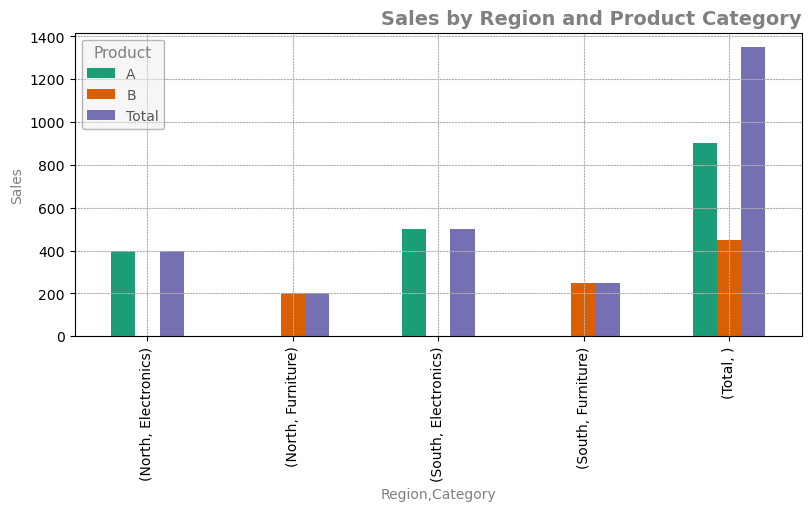

In [11]:
import matplotlib.pyplot as plt

# Example of visualizing the pivot table
pivot_table_margins.plot(kind='bar')
plt.title('Sales by Region and Product Category')
plt.ylabel('Sales')
plt.show()

In [12]:
data = {
    "Date": [
        "2023-01-01",
        "2023-01-01",
        "2023-01-02",
        "2023-01-02",
        "2023-01-03",
        "2023-01-03",
        "2023-01-04",
        "2023-01-04",
    ],
    "Region": [
        "North",
        "South",
        "North",
        "South",
        "North",
        "South",
        "North",
        "South",
    ],
    "Product": ["A", "A", "B", "B", "A", "A", "B", "B"],
    "Category": [
        "Electronics",
        "Electronics",
        "Furniture",
        "Furniture",
        "Electronics",
        "Electronics",
        "Furniture",
        "Furniture",
    ],
    "Sales": [100, 150, 200, 250, 300, 350, 400, 450],
}

df = pd.DataFrame(data)
df

,Date,Region,Product,Category,Sales
0,2023-01-01,North,A,Electronics,100
1,2023-01-01,South,A,Electronics,150
2,2023-01-02,North,B,Furniture,200
3,2023-01-02,South,B,Furniture,250
4,2023-01-03,North,A,Electronics,300
5,2023-01-03,South,A,Electronics,350
6,2023-01-04,North,B,Furniture,400
7,2023-01-04,South,B,Furniture,450


In [13]:
pivot_table_sales = pd.pivot_table(
    df, values="Sales", index="Region", columns="Product", aggfunc="sum"
)
pivot_table_sales

Product,A,B
Region,,
North,400,600
South,500,700


In [14]:
pivot_table_sales_margins = pd.pivot_table(
    df,
    values="Sales",
    index="Region",
    columns="Product",
    aggfunc="sum",
    margins=True,
    margins_name="Total",
)
pivot_table_sales_margins

Product,A,B,Total
Region,,,
North,400,600,1000
South,500,700,1200
Total,900,1300,2200


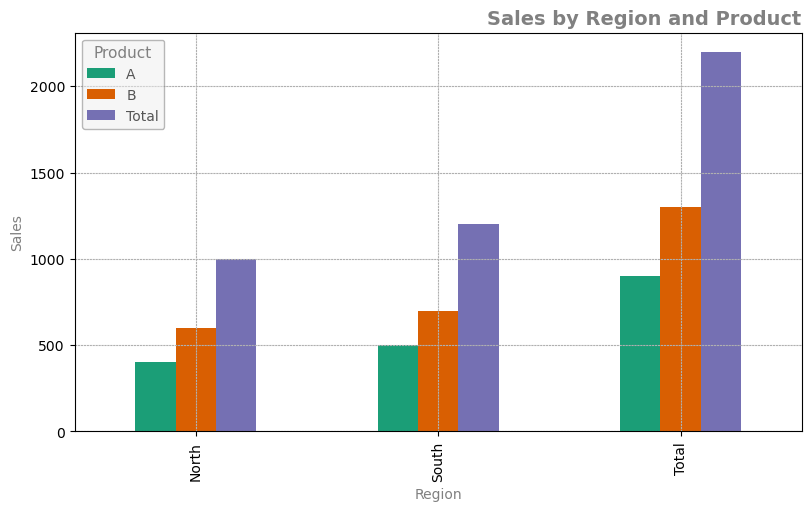

In [15]:
pivot_table_sales_margins.plot(kind='bar')
plt.title('Sales by Region and Product')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

In [16]:
data = {
    "CustomerID": [1, 2, 1, 3, 2, 3, 1, 2],
    "PurchaseDate": [
        "2023-01-01",
        "2023-01-01",
        "2023-01-02",
        "2023-01-02",
        "2023-01-03",
        "2023-01-03",
        "2023-01-04",
        "2023-01-04",
    ],
    "Category": [
        "Electronics",
        "Electronics",
        "Furniture",
        "Furniture",
        "Electronics",
        "Electronics",
        "Furniture",
        "Furniture",
    ],
    "Amount": [120, 150, 200, 250, 300, 350, 400, 450],
}

df = pd.DataFrame(data)
df

,CustomerID,PurchaseDate,Category,Amount
0,1,2023-01-01,Electronics,120
1,2,2023-01-01,Electronics,150
2,1,2023-01-02,Furniture,200
3,3,2023-01-02,Furniture,250
4,2,2023-01-03,Electronics,300
5,3,2023-01-03,Electronics,350
6,1,2023-01-04,Furniture,400
7,2,2023-01-04,Furniture,450


In [17]:
pivot_table_customer = pd.pivot_table(
    df,
    values="Amount",
    index="CustomerID",
    columns="Category",
    aggfunc="sum",
    fill_value=0,
)
pivot_table_customer

Category,Electronics,Furniture
CustomerID,,
1,120,600
2,450,450
3,350,250


In [18]:
pivot_table_customer_margins = pd.pivot_table(
    df,
    values="Amount",
    index="CustomerID",
    columns="Category",
    aggfunc="sum",
    fill_value=0,
    margins=True,
    margins_name="Total",
)
pivot_table_customer_margins

Category,Electronics,Furniture,Total
CustomerID,,,
1,120,600,720
2,450,450,900
3,350,250,600
Total,920,1300,2220


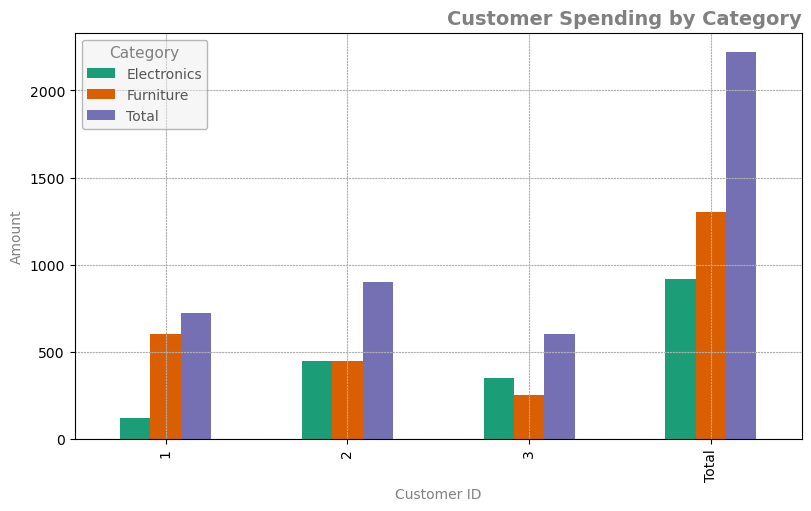

In [19]:
pivot_table_customer_margins.plot(kind='bar')
plt.title('Customer Spending by Category')
plt.xlabel('Customer ID')
plt.ylabel('Amount')
plt.show()